In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

# Introduction

In this project, we will play the role of a data analyst working for an e-learning company that offers courses on coding. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our products and we'd like to invest some money in advertisement. 

## Project goal

Our goal in this project is to find out the two best markets to advertise our product.

## Data

To find out the two best markets to advertise in, we will use the [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). 

Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web and mobile development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [36]:
# Reading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/Artur-Wanderley/Portfolio-of-my-data-science-projects/master/Finding%20the%20Best%20Markets%20to%20Advertise%20In/2017-fCC-New-Coders-Survey-Data.csv",
               low_memory=False)
print(df.shape)
df.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see the dataset has 18175 rows, each row corresponding to one survey respondent, and 136 columns containing various types of information such as personal information (Age, Country, education, etc) and professional interests.

# Finding the most common job interests


As most courses offered by our e-learning company are on web and mobile development, let's first find out which proportion of the respondents are interested in web or mobile development careers.

The `JobRoleInterest`column has information about the job roles the participants of the survey are interested in. Let's take a look at this column.

In [37]:
df["JobRoleInterest"].dropna().head(20)

1                              Full-Stack Web Developer
2       Front-End Web Developer, Back-End Web Develo...
3       Front-End Web Developer, Full-Stack Web Deve...
4     Full-Stack Web Developer, Information Security...
6                              Full-Stack Web Developer
9     Full-Stack Web Developer,   Quality Assurance ...
11      DevOps / SysAdmin,   Data Scientist, Informa...
13    Back-End Web Developer, Full-Stack Web Develop...
14                             Full-Stack Web Developer
15                             Full-Stack Web Developer
16                             Full-Stack Web Developer
18    Full-Stack Web Developer,   Front-End Web Deve...
19      Front-End Web Developer,   Mobile Developer,...
21                                 Information Security
22                             Full-Stack Web Developer
23                               Back-End Web Developer
28                             Full-Stack Web Developer
29      Front-End Web Developer,   Data Scientis

As we can see, the respondents can demonstrate an interest in more than one job role.

Let's build a frequency distribution table to have a better idea of the number of job roles the respondents are interested in. 

In [38]:
# Frequency distribution table of the number of job roles respondents are interested
job_interests_no_null=df["JobRoleInterest"].dropna()
job_interests_list=job_interests_no_null.str.split(",")
number_job_interests=job_interests_list.apply(lambda x:len(x))
frequency_table=number_job_interests.value_counts(normalize=True).sort_index()*100
frequency_table=pd.DataFrame(frequency_table)
frequency_table.reset_index(inplace=True)
frequency_table.rename(columns={"index":"number of job roles of interest","JobRoleInterest":"Percentage of participants"},inplace=True)
frequency_table

,number of job roles of interest,Percentage of participants
0,1,31.650458
1,2,10.883867
2,3,15.889588
3,4,15.217391
4,5,12.042334
5,6,6.721968
6,7,3.861556
7,8,1.759153
8,9,0.986842
9,10,0.471968


The frequency table reveals that about 70% of the respondents are interested in more than one job role.

Now, let's find out amongst the multiple job role interests the respondents have, which proportion includes web or mobile development.

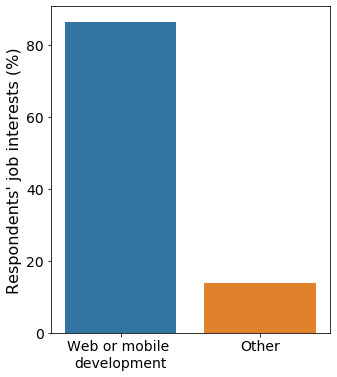

In [39]:
# Plotting the percentange of respondents' interested in web or mobile 
web_mobile_interest=job_interests_no_null.str.contains("web|mobile",flags=re.IGNORECASE).sum()/job_interests_no_null.shape[0]*100
fig, ax=plt.subplots(figsize=(5,6))
sns.barplot(x=["Web or mobile \ndevelopment","Other"],y=(web_mobile_interest,100-web_mobile_interest))
ax.tick_params(labelsize=14)
ax.set_ylabel("Respondents' job interests (%)", fontsize=16)
plt.show()

As we can see, the vast majority of participants have demonstrated an interest in web or mobile development.

It means that the freeCodeCamp's 2017 New Coder Survey is a good source of information to find out the two best markets to advertise in.

# New Coders - Locations and Densities

Now that we know the data set we are using has a large amount of information about people interested in learning web and mobile development (the specialty of our e-learning company), let's find out which are best two markets to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

Let's find out which countries have the high number of newcoders.

In [40]:
# Frequency distribution table of respondents by country
df_clean_job_interest=df[pd.notnull(df["JobRoleInterest"])]# Drop rows where job role interest was not informed
abs_freq=df_clean_job_interest["CountryLive"].value_counts()
relat_freq=df_clean_job_interest["CountryLive"].value_counts(normalize=True)*100
country_freq=pd.DataFrame({"Absolute frequency":abs_freq,"Relative frequency":relat_freq})
country_freq.round(2).head(4)

,Absolute frequency,Relative frequency
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80


The USA is by far the country with the highest amount of respondents, followed by India, the UK, and Canada.

However, knowing which countries have the greatest number of new coders is not enough to decide the two markets we will pick to advertise in. 

The subscription to our e-learning platform costs 59.00 USD per month. So, we need to know how much money did the survey respondents spent per month for learning to code. 

# Spending Money for Learning

Let's find out how much money the survey respondents invested in coding education per month.

In [41]:
# Slice data by USA, India, UK and Canada
df_english_speak=df_clean_job_interest.loc[df_clean_job_interest["CountryLive"].isin(["United States of America","India","United Kingdom","Canada"])].copy()
df_english_speak.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,44.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,27.0,1.0,1.0,0.0,Code Fellows,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Average amount of money spent per month for learning to code in the USA, India, UK and Canada
df_english_speak["MonthsProgramming"]=df_english_speak["MonthsProgramming"].apply(lambda x: 1 if x==0 else x) # Replace 0 by 1
df_english_speak["MoneyForLearningMonth"]=df_english_speak["MoneyForLearning"]/df_english_speak["MonthsProgramming"]
df_english_speak=df_english_speak[np.isfinite(df_english_speak["MoneyForLearningMonth"])] # Drop NaN values
AvgMoneyForLearningMonth=df_english_speak.groupby("CountryLive").mean()["MoneyForLearningMonth"].sort_values(ascending=False)
AvgMoneyForLearningMonth

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MoneyForLearningMonth, dtype: float64

In [56]:
# Computing the frequency of respondents by country which spent more than 59 USD per month for learning
x=(df_english_speak["MoneyForLearning"]/df_english_speak["MonthsProgramming"])>59
abs_freq_59_more=df_english_speak[x]["CountryLive"].value_counts()
relat_freq_59_more=df_english_speak[x]["CountryLive"].value_counts(normalize=True)
freq_table_spent_59_more=pd.DataFrame({"Spent 59 USD or more (absolute frequency)":abs_freq_59_more,"Spent 59 USD or more (relative frequency)":relat_freq_59_more})
freq_table_spent_59_more

,Spent 59 USD or more (absolute frequency),Spent 59 USD or more (relative frequency)
United States of America,653,0.812189
India,69,0.085821
United Kingdom,43,0.053483
Canada,39,0.048507


The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies)), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

# Dealing with extreme outliers

Let's use boxplots to plot our data and find out whether there are outliers in the amount of money spent per month on coding education for respondents in the USA, India, UK, and Canada.

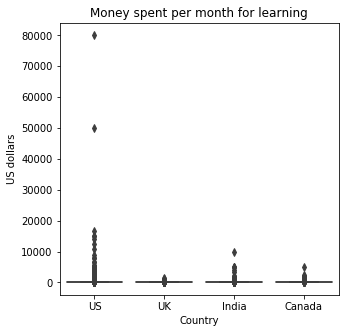

In [44]:
# Plot boxplots of money spent per month for learning to code
fig=plt.figure(figsize=(5,5))
sns.boxplot(y="MoneyForLearningMonth",x="CountryLive",data=df_english_speak)
plt.title("Money spent per month for learning")
plt.xlabel("Country")
plt.ylabel("US dollars")
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])# avoid tick labels overlap
plt.show()

There are two extreme outliers in the USA informing that two students spent more than 50 000 US dollars per month. It is very unlikely these values are true, given these are enormous amounts of money to pay monthly in education. Instead, these extreme outliers are more likely to be a typo or other kind of error that occurred during the survey.

Let's drop from our dataframe any value > 50 000 in the `MoneyForLearningMonth` column.

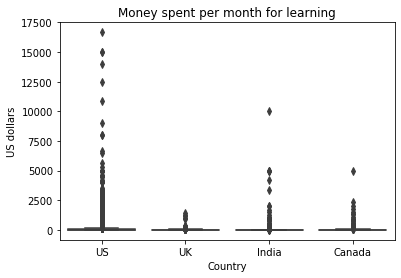

In [45]:
# Removing outliers from the MoneyForLearningMonth column
df_english_speak=df_english_speak[df_english_speak["MoneyForLearningMonth"]<50000]
sns.boxplot(x="CountryLive",y="MoneyForLearningMonth",data=df_english_speak)
plt.title("Money spent per month for learning")
plt.xlabel("Country")
plt.ylabel("US dollars")
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])# avoid tick labels overlap
plt.show()

Except for the UK, our data still show many suspicious outliers. It's hard to know whether they are realistic or not. The outliers values may be true if students have taken several bootcamps, which are usually very expensive.

Let's find out whether the extreme outliers in each country are students that took bootcamps.

### Looking at USA outliers

In [46]:
# Looking at USA outliers
df_english_speak[(df_english_speak["MoneyForLearningMonth"]>=7500) & 
                             (df_english_speak["CountryLive"]=="United States of America")]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000
17231,50.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000


Of the nine outliers in the USA, only three attended to bootcamps, thus, for them, it seems reasonable they spent over 7500 US dollars for learning to code. Let's keep these three outliers and remove the other six that supposedly spent over 7500 US per month for learning to code, but did not take any bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove all these eight outliers.

In [47]:
# Removing the respondents that spent more than 7500 US dollars per month for learning to code without taking any bootcamp
no_bootcamp=df_english_speak[(df_english_speak["MoneyForLearningMonth"]>=7500) & 
                             (df_english_speak["CountryLive"]=="United States of America") &
                             (df_english_speak["AttendedBootcamp"]==0)
                ]

df_english_speak=df_english_speak.drop(no_bootcamp.index)

# Removing the respondents that had been programming for less than 3 months
less_than_3_months=df_english_speak[(df_english_speak["MoneyForLearningMonth"]>=7500) & 
                             (df_english_speak["CountryLive"]=="United States of America") &
                             (df_english_speak["MonthsProgramming"]<3)
                ]
df_english_speak=df_english_speak.drop(less_than_3_months.index)

### Looking at India outliers

If we take a look at the boxplot above, we'll notice that India has a few outliers above 2500 US dollars.

Let's see whether these outliers are respondents that took bootcamps.

In [48]:
df_english_speak[(df_english_speak["MoneyForLearningMonth"]>=2500) & 
                             (df_english_speak["CountryLive"]=="India")]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


As we can see above, none of the outliers informed to have attended to bootcamps. 
So, let's drop these rows too.

In [49]:
# Removing respondents that spent more than 2500 US dollars per month for learning to code without attending too any bootcamp
india_outliers=df_english_speak[(df_english_speak["MoneyForLearningMonth"]>=2500) & 
                             (df_english_speak["CountryLive"]=="India")]

df_english_speak=df_english_speak.drop(india_outliers.index)

### Looking at Canada outliers

The boxplot above reveals one outlier above 2500 in Canada. Let's take a look at it to find out whether this respondent took a bootcamp or not.

In [50]:
df_english_speak[(df_english_speak["MoneyForLearningMonth"]>=2500) & 
                             (df_english_speak["CountryLive"]=="Canada")]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [51]:
canada_outlier=df_english_speak[(df_english_speak["MoneyForLearningMonth"]>=2500) & 
                             (df_english_speak["CountryLive"]=="Canada")]

df_english_speak=df_english_speak.drop(canada_outlier.index)

## Looking at the data without unrealistic outliers

Now that we have cleaned the suspicious outliers, let's take a look at our data once more.

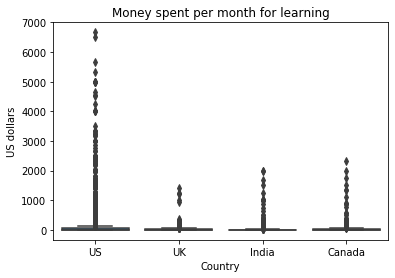

In [52]:
# Boxplot without unrealistc outliers removed
sns.boxplot(x="CountryLive",y="MoneyForLearningMonth",data=df_english_speak)
plt.title("Money spent per month for learning")
plt.xlabel("Country")
plt.ylabel("US dollars")
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])# avoid tick labels overlap
plt.show()

# Choosing the two best markets

Let's compute the average amount of money spent for learning per month.

In [53]:
df_english_speak.groupby("CountryLive").mean()["MoneyForLearningMonth"].sort_values(ascending=False)

CountryLive
United States of America    147.063012
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: MoneyForLearningMonth, dtype: float64

Also, remember that our courses cost 59 US dollars per month, so it's important to know the total and relative frequency of respondents per country that spent 59 US dollars or more per month.

In [55]:
x=(df_english_speak["MoneyForLearning"]/df_english_speak["MonthsProgramming"])>59
abs_freq_59_more=df_english_speak[x]["CountryLive"].value_counts()
relat_freq_59_more=df_english_speak[x]["CountryLive"].value_counts(normalize=True)*100
freq_table_spent_59_more=pd.DataFrame({"Spent 59 USD or more (absolute frequency)":abs_freq_59_more,"Spent 59 USD or more (relative frequency)":relat_freq_59_more})
freq_table_spent_59_more

,Spent 59 USD or more (absolute frequency),Spent 59 USD or more (relative frequency)
United States of America,653,81.218905
India,69,8.582090
United Kingdom,43,5.348259
Canada,39,4.850746


The USA is obviously one of the markets to pick. There a plenty of new coders there that can afford to pay our subscription value.

The second market to pick seems to be either India or Canada. The average money spent per month for learning in Canada is greater in Canada (93.06 US dollars) than in India (65.76 US dollars). On the other hand, in India, a greater amount of respondents (in both absolute and relative terms) spent 59 US dollars or more per month for learning than in Canada. 

So, we can either decide to advertise only in the USA and India or advertise in the in the US, India and Canada.

Let's send our analysis to the market team and let them decide based on their domain knowledge.